#19-1. 들어가며
##NLP의 multimodal 확장

---

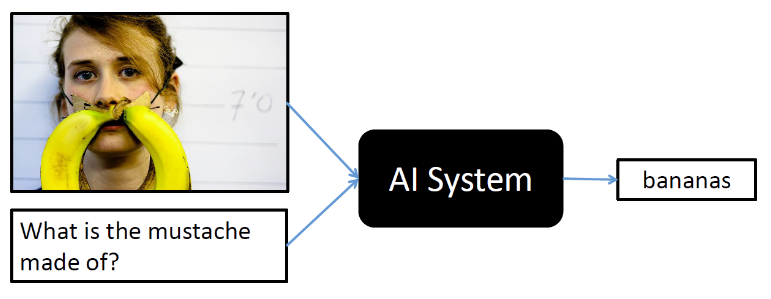

https://visualqa.org/challenge.html
우리는 Attention이라는 개념을 바탕으로 꾸준히 발전해 온 NLP 모델들의 발전사를 대략 살펴보았습니다.

하지만 지금까지 우리가 언어 모델을 만들어온 방법들은 모두 언어 그 자체를 데이터로 삼아 언어를 모델링하는 것들이었습니다. 기억하실지 모르지만, 이 방법에는 한가지 숨은 전제가 있었습니다.

언어의 의미를 직접 모델링할 수 없다. 다만 주변의 맥락을 통해 간접적으로만 모델링할 수 있다.

왜 그럴까요? 1950년대 이후 언어를 논리기호와 수식을 가지고 직접 모델링하려던 시도들은 모두 실패로 돌아갔습니다. 지금까지 가장 성공적인 언어 모델은 Word2Vec, Next Token Prediction(GPT), Masked Language Modeling(BERT) 등의 방법을 통해, 간접적으로 벡터화하는 방법들이었습니다.

어쩌면 이런 방법들은 언어의 의미를 본질적으로 이해할 수 없을지도 모릅니다. 왜냐구요? 우리는 언어의 사용 경험을 통해 어떤 언어와 비언어적인 어떤 사물, 사건, 경험을 연결 짓는 일을 계속합니다. 예를 들어 생각해 봅시다. 선천적으로 눈이 먼 사람이 'red', 'yellow'라는 단어의 의미를 본질적으로 이해할 수 있을까요? 어렴풋이 추론하려고만 해도 실은 저런 단어들을 시각적인 경험이 아니라 'warm', 'cozy' 같은 다른 감각의 경험과 연결 지어 간접적으로만 이해 가능할 것입니다.

그래서 NLP 연구의 주요 흐름 중에는 위 그림과 같이 이미지에 대한 질문을 텍스트로 주었을 때 텍스트로 답변을 하는 Visual QA 같은 task가 있습니다. 이런 task들은 반드시 텍스트의 의미, 이미지의 해석이 가능할 뿐 아니라 텍스트와 이미지 속 사물을 연결 지어 해석하는 능력까지 갖춘 모델이어야 수행 가능한 것입니다. 이런 모델이야말로 텍스트만으로는 절대 이해할 수 없는 언어의 보다 정확한 의미를 기계가 이해하도록 하는데 궁극적으로 도움이 될 수 있지 않을까요?

Multimodal NLP task란 텍스트뿐 아니라 이미지, 사운드 등 다양한 데이터 modality를 결합해서 해석할 것을 요구받는 task를 말합니다. 오늘 우리는 이런 task의 특징과 데이터셋들을 간단히 훑어보고, 그동안 이런 task를 해결하기 위해 어떻게 딥러닝 기술이 발전해 왔는지를 살펴볼 것입니다.

오늘의 목차

Multimodal NLP tasks

Show, Attend and Tell

Co-Attention Networks

LXMERT

#19-2. Multimodal NLP tasks
##Multimodal NLP task의 종류

---

사람들에게 자연어는 시각, 후각, 청각 등 모든 오감과 연관되어 처리되는 것이므로 기본적으로 Multimodal task가 될수밖에 없습니다. 하지만 지금까지 주로 Multimodal NLP task라고 할 땐 주로 시각데이터(이미지, 영상)과 결합된 형태를 말합니다.

💡 참고
Cross-modal 이라는 표현도 자주 사용됩니다. 이번 노드에서는 Multimodal 이라는 용어로 통일하여 사용하도록 하겠습니다.

이미지와 텍스트가 결합된 multimodal task로 널리 알려진 것에는 image captioning, visual QA(VQA), visual dialog 등이 있습니다. 이들 각각이 어떻게 다른지 혼란스러울 수 있기 때문에 이들간의 차이를 잘 보여주는 아래 그림을 살펴봐 주시기 바랍니다.

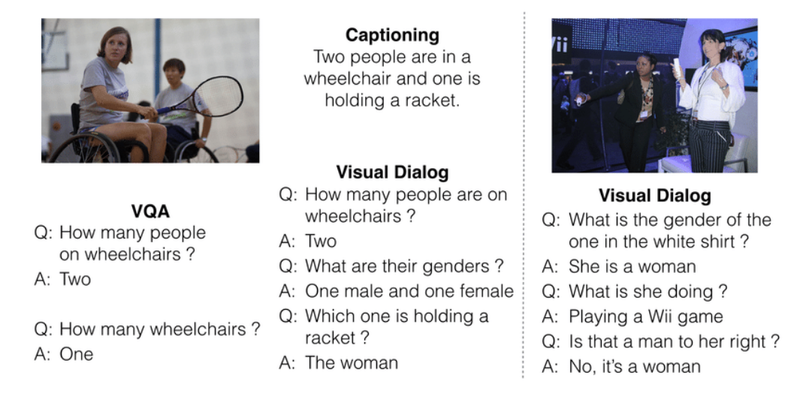

https://www.researchgate.net/figure/Differences-between-image-captioning-Visual-Question-Answering-VQA-and-Visual-Dialog_fig1_311066615
🔶 image captioning
image captioning은 이미지를 입력으로 주었을 때 해당 이미지를 잘 설명하는 텍스트를 모델이 생성하는 task입니다. 그래서 이미지를 입력, 텍스트를 출력으로 하는 Encoder-Decoder 모델로 다루기 용이합니다.

이 task는 상대적으로 구현하기 용이하여 딥러닝 기반 NLP 연구의 초기에 많이 사용되었습니다. 하지만 이 task에는 단점이 있습니다. 바로 '정답이 하나로 고정되지 않는다'라는 것입니다. 그렇다 보니 훈련은 [MS-COCO](https://cocodataset.org/#home) 등 이미지-텍스트의 pair를 포함하는 데이터셋을 통해 지도학습 방식으로 수행할 수 있지만, 그렇게 훈련된 모델의 성능을 정량적으로 평가하는 metric을 만들기가 어렵다는 단점이 있습니다.

🔶 Visual QA(VQA)
VQA task의 구성은 SQuAD와 같이 context와 question이 주어진 후에 answer를 물어보는 QA task의 형태를 띄고 있습니다. 단지 여기서 context가 이미지로 이루어져 있다는 차이가 있을 것입니다.

VQA task는 VQA: [Visual Question Answering](https://arxiv.org/pdf/1505.00468.pdf)이라는 논문을 통해 공식적으로 제안되었습니다. 이 논문은 [www.visualqa.org](https://aiffelstaticprd.blob.core.windows.net/contents/www.visualqa.org)에서 운영하는 CVPR 워크샵 챌린지용 task로 제안된 것입니다.

이런 QA 형태는 Accuracy 같은 정량적인 metric으로 모델을 평가하기가 image captioning task보다 훨씬 용이합니다. 그러면서도 이미지와 텍스트의 의미관계를 연결지을 수 있어야 대답할 수 있는 question이 주어지기 때문에, 지금도 VQA task는 NLP 분야에서 핫하게 다루어지고 있습니다.

🔶 Visual Dialog
Visual Dialog는 하나의 image context를 놓고 QA를 여러번 반복하는 것으로 보입니다. 그러나, 위 그림의 사례를 잘 보면 질문/답변들 사이에 논리적 연관성이 있다는 것을 알 수 있습니다.

따라서 이 task는 VQA보다 더욱 난이도가 높습니다. 그러나 궁극적으로 AI가 인간과 상황을 공유하면서 맥락이 이어지는 대화를 나눌 수 있는지를 알아보기 위해 향후 중요하게 다루어지게 될 task라고 볼 수 있습니다.

🔶 Image-Text Matching
Image captioning, VQA보다 조금 쉬운 task로 image-text matching을 생각해볼 수 있습니다. 이 task는 이미지와 텍스트를 함께 입력하고, 텍스트가 이미지를 잘 설명하는지 여부를 맞추는 binary classification task로 구성되어 있습니다. Image captioning에 사용되는 데이터셋을 negative sampling 방식으로 구성한다면 이런 binary classification task를 손쉽게 훈련시킬 수 있을 것입니다.

잘 훈련된 image-text matching 모델은 성능을 정량적으로 평가하기 어려운 Image Captioning 모델의 정량적인 평가를 가능하게 하는 대안이 될 수 있습니다.

🔶 Knowledge-Aware VQA (KVQA)
단순히 image와 question만으로 답변이 가능한 VQA를 뛰어넘어, 별도의 knowledge base를 활용해야 답변 가능한 task를 말합니다. [VisualGenome](https://visualgenome.org/) 데이터셋 등을 활용하면 그래프 구조의 knowledge base를 활용한 VQA task를 구성할 수 있습니다.

##Multimodal NLP용 데이터셋

---

이러한 task를 학습하기 위한 데이터셋을 구하는 것은 쉽지 않습니다. 특히 한국어 기반 데이터셋을 구하기 힘든 것이 아쉬운 실정입니다.

영어 기반 공개 데이터셋은 아래와 같은 것들을 활용할 수 있습니다.

🔷 Flicker-8k, Flicker-30k
이 데이터셋은 Image captioning과 같은 'sentence-based image description task' 전용으로 만들어진 데이터셋입니다. flicker에 올라온 이미지 1개당 5개씩의 설명 text 쌍으로 이루어져 있는 방식으로 구성되어 있습니다. Image captioning 모델의 성능을 측정하는 표준 benchmark dataset으로 오랫동안 활용되어 왔습니다. 8k와 30k는 데이터셋에 포함된 이미지 파일 개수를 의미합니다.

[Flicker-8k 데이터셋](https://www.kaggle.com/ming666/flicker8k-dataset)
[Flicker-30k 데이터셋](https://www.kaggle.com/hsankesara/flickr-image-dataset)


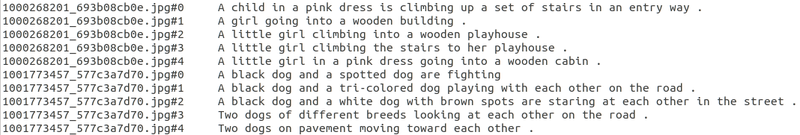
[Flicker-8k 데이터셋 예시]
🔷 MS-COCO
Microsoft에서 2013년부터 배포한 MS-COCO 데이터셋에서, COCO란 'Common Objects in Context'의 약자입니다. 이 데이터셋은 'image captioning' 정도가 아니라 object detection, keypoints, pose 등 computer vision 분야의 다양한 task들을 광범위하게 지원하는 매우 큰 규모의 데이터셋입니다.

VQA task를 처음 제안한 논문에도 MS-COCO 데이터셋이 언급되어 있습니다. 논문에 언급된 VQA용 MS-COCO 데이터셋의 예시는 아래 그림과 같습니다.

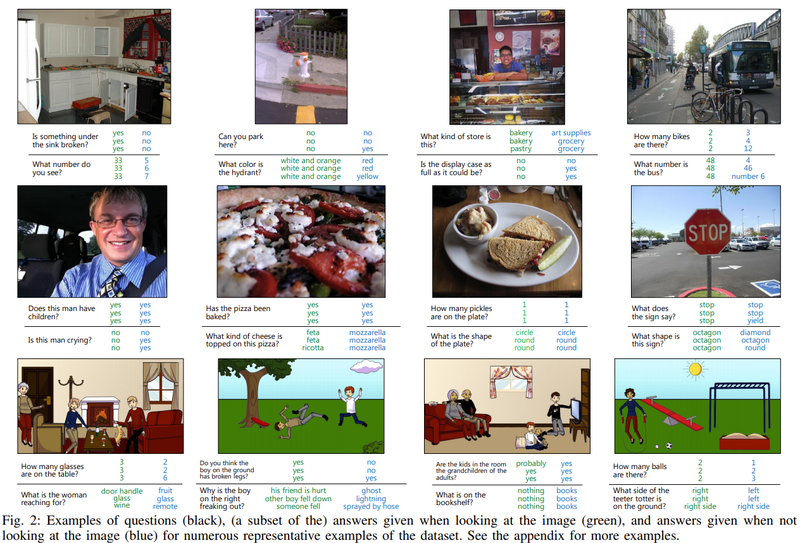

https://arxiv.org/pdf/1505.00468.pdf
🔷 VQA Challenge Dataset
VQA challenge를 관장하는 [www.visualqa.org](https://aiffelstaticprd.blob.core.windows.net/contents/www.visualqa.org)에서 제공하는 공식 챌린지용 데이터셋입니다. 2015년에 V1.0, 2017년에 V2.0이 배포되었습니다. 상세한 내용은 아래 링크에서 확인할 수 있습니다.

[VQA 데이터셋 다운로드](https://visualqa.org/download.html)

VQA 데이터셋의 기본 구성은 MS-COCO의 것과 크게 다르지 않습니다. 그러나 V2.0으로 가면서 이미지 이해에 대한 중요성이 좀더 강조되는 형태로 개선되었습니다. 아래 그림에서 언급된 [Making the V in VQA Matter: Elevating the Role of Image Understanding in Visual Question Answering](https://arxiv.org/pdf/1612.00837.pdf) 논문에서 어떻게 이미지가 더 강조되는지를 확인할 수 있습니다. 동일한 질문(텍스트)에 대해서 이미지에 따라 답이 달라지기 때문에 이미지에 대한 이해를 명확히 하는 것이 더욱 중요해졌습니다.

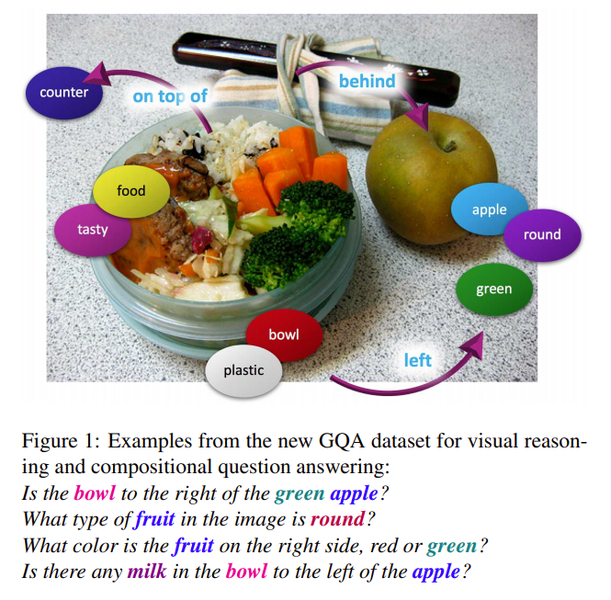

https://arxiv.org/pdf/1612.00837.pdf
🔷 GQA
이전까지의 VQA를 한차원 뛰어넘어 'Visual Reasoning'을 추구하기 위해 2019년에 배포된 GQA 데이터셋은 image, question, answer로만 구성되었던 종래의 VQA 구성과 달리, object graph를 통한 semantic representation까지 훈련데이터셋에 함께 제공한다는 특징을 가집니다. 아래 그림에서 보는 것처럼 질문 자체도 보다 이미지 내 object 간 관계를 추론해야 답변할 수 있는 형태로 구성되고 있음을 알수 있습니다.

이후 VQA 관련 최신 연구 논문에서는 GQA도 빠지지 않고 함께 다루어지고 있습니다.

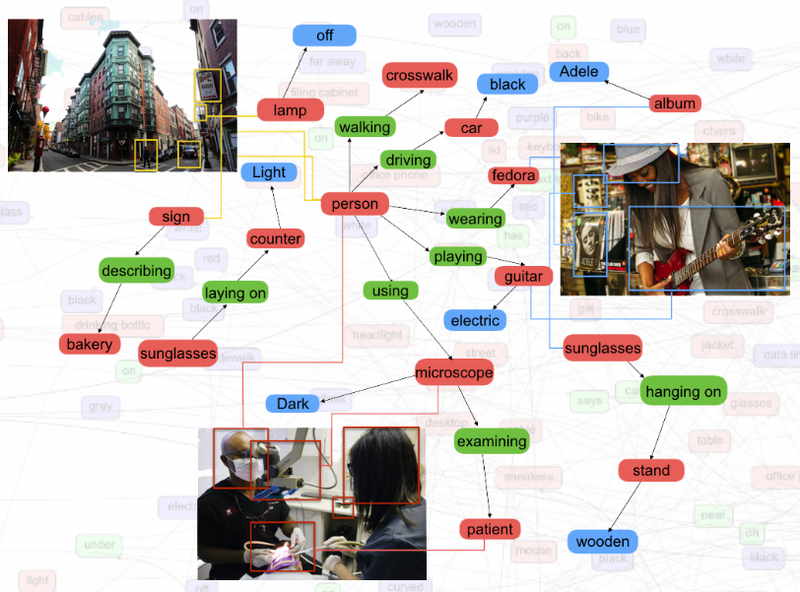

https://openaccess.thecvf.com/content_CVPR_2019/papers/Hudson_GQA_A_New_Dataset_for_Real-World_Visual_Reasoning_and_Compositional_CVPR_2019_paper.pdf


🔷 VisualGenome
Knowledge-aware VQA task를 구성하기 위한 데이터셋 중 대표적인 것으로 VisualGenome을 들 수 있습니다. 이 데이터셋은 2016년에 배포된 것이지만, VQA 연구가 계속됨에 따라 더욱 그 유용성이 증대되고 있습니다.

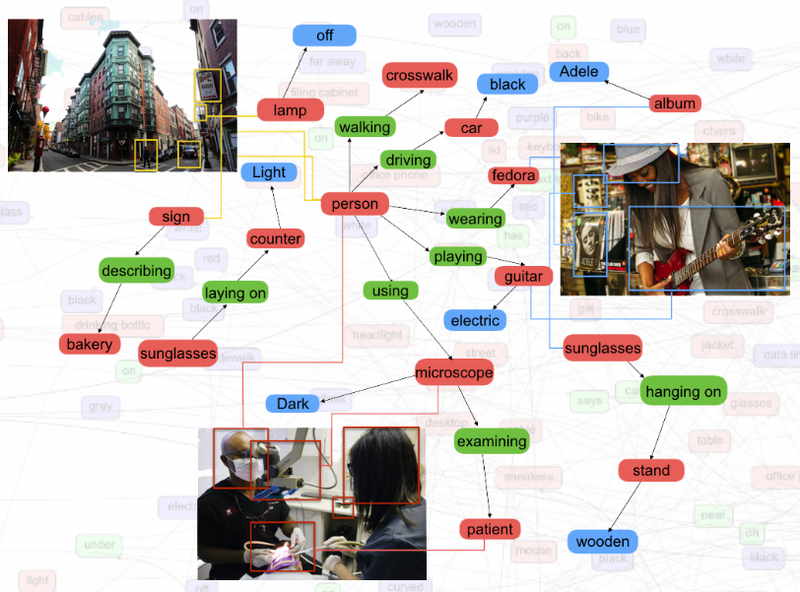

https://visualgenome.org/

#19-3. Show, Attend and Tell

##Attention이 적용된 Image Captioning

---

Image Captioning task는 computer vision 분야에서 꽤 오랫동안 연구된 주제였습니다. 그러던 중 NLP 분야의 seq2seq이나 attention 개념이 나오면서, 이 개념들을 image captioning 분야에 적용한 시도들이 나오게 되었습니다.

🔶 Show and Tell
[Show and Tell](https://arxiv.org/pdf/1411.4555.pdf) 은 seq2seq의 Encoder-Decoder 구조에 영감을 받아 제안되었습니다. Image Captioning task를 이미지를 입력데이터로, 텍스트를 출력데이터로 하는 Encoder-Decoder 구조에 대입한다면, 아래 그림에서 보는 것처럼 CNN 기반의 Encoder로 해석한 이미지 벡터를 Decoder의 입력으로 삼아 이미지를 해석하는 문장을 생성하게 하는 것입니다.


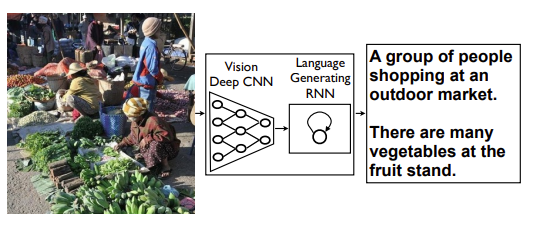

https://arxiv.org/pdf/1411.4555.pdf


🔶 Show, Attend and Tell
2014년은 NLP 분야의 획기적 도약의 계기를 마련해 준 Attention 개념이 탄생한 해입니다. 하지만 정작 재미있는 것은 Attention 개념을 처음 소개한 [Neural Machine Translation by Jointly Learning to Align and Translate](https://arxiv.org/pdf/1409.0473.pdf) 논문에는 Attention이라는 표현이 등장하지 않는다는 점입니다. 이후, 몬트리올 대학의 Yoshua Bengio 팀에서, 당시 발견한 Attention 개념을 제대로 정립하고 Attention이라는 용어로 개념화하여 처음으로 소개한 논문이 바로 2015년에 발표된 [Show, Attend and Tell](https://arxiv.org/pdf/1502.03044.pdf)입니다.

Seq2seq 개념을 Image Captioning에 적용한 것이 Show and Tell이라면, Attentioinal seq2seq 개념을 Image Captioning에 적용한 것이 바로 Show, Attend and Tell 이라고 할 수 있습니다. Attention 개념의 핵심은 디코딩하는 포지션에 따라 인코더의 hidden state를 참조하는 가중치가 달라진다는 점입니다. 아래 그림을 보면 이 논문에는 그러한 Attention 개념이 정확히 적용되어 있음을 알 수 있습니다.

다만, Encoder에 입력되는 데이터가 sequential한 텍스트 데이터가 아니라 2차원 공간상의 이미지 데이터라는 차이가 있습니다. 그러므로 여기서의 attention은 spatial attention 개념을 가지도록 해야 합니다. 텍스트 생성 스텝마다 입력 이미지의 어느 부분을 더 주목해야 할지 그 2차원 공간상의 부분을 특정할 수 있도록 하기 위해, Encoder를 Convolution Feature Extractor로 만들어 그 feature map을 14X14로 만드는 간단한 트릭을 사용합니다. 그러면 196개의 feature map 중 attention 수치가 높은 것의 receptive field에 해당하는 부분을 주목하고 있다고 할 수 있겠죠?

이 개념은 오늘날의 관점으로 보면 매우 간단하지만 Multimodal NLP task에 attention 개념이 적용된 첫 번째 사례라고 볼 수 있습니다. 이후로 Multimodal NLP task에는 attention 개념이 필수적으로 사용되게 됩니다.


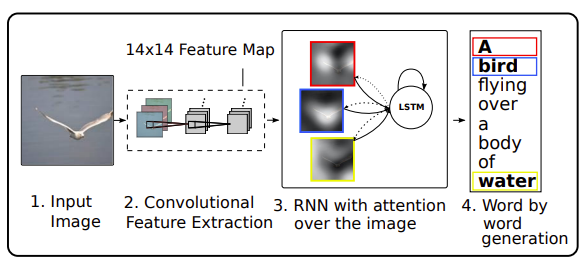

https://arxiv.org/pdf/1502.03044.pdf
위 그림에서 디코더의 포지션이 빨간색(A), 파란색(bird), 노란색(water)으로 바뀔 때마다 feature map의 가중치가 높게 나타나는 부분을 하얗게 시각화했을 때, 텍스트 내용과 이미지에서 주목하고 있는 부분이 어느 정도 일치하고 있음을 확인할 수 있습니다.

#19-4. Co-Attention Networks

##Co-Attention 구조의 보편화

---

이전 스텝에서 살펴본 Show, Attend and Tell의 Encoder-Decoder 구조 이후 Multimodal NLP task를 접근하는 보편적인 모델 구조로 Co-Attention 구조가 널리 활용됩니다.

2016년에는 Attention 구조가 아주 활발히 연구되고 있었습니다. 이를 VQA같은 Multimodal NLP task에 적용해 보려는 시도도 아주 활발했는데, 초기의 Encoder-Decoder 구조와 달리, 이미지와 텍스트에 대한 attention을 함께(jointly) 학습하여, 이를 합쳐 하나의 결론을 내는 co-attention 구조가 multimodal task에 더욱 효과적임이 밝혀지면서, 이러한 구조가 다양하게 시도되었습니다.

🔶 Dual Attention Network (DAN)

아래 소개할 [Dual Attention Networks for Multimodal Reasoning and Matching](https://arxiv.org/pdf/1611.00471.pdf)은 Dual Attention Network(DAN)이라는 이름으로 VQA나 image-text matching task의 성능을 개선한 대표적인 모델 중 하나입니다. 이 모델을 통해 co-attention의 일반적인 구조를 살펴볼 수 있습니다.

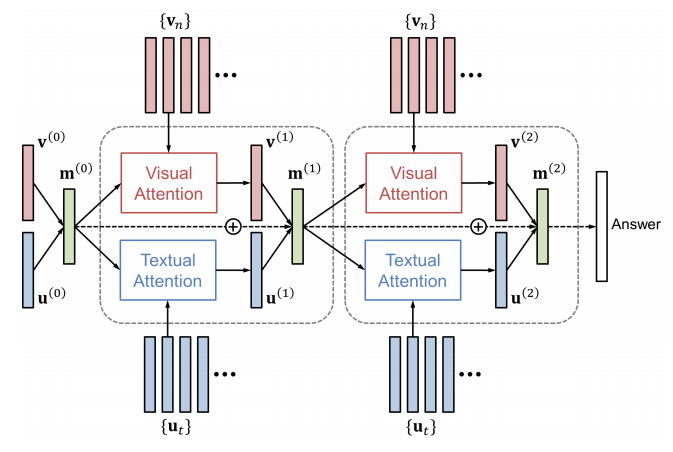

https://arxiv.org/pdf/1611.00471.pdf
위 그림에서 파란색 textual context vector 와 붉은색 visual context vector  에 대해 각각을 계산하는 attention이 별도로 존재하면서, 이 attention에 대한 입력 에는 두 context vector가 함께 작용하기 때문에, 결과적으로는 두 context vector가 서로 상대편 modality에 대한 연관성을 함께 학습하게 되는 효과를 가집니다.

$$ m^{(k)} = m^{(k-1)} + v^{(k)} \odot  u^{(k)} $$

위 식을 보면 co-attention 레이어는 그 입력 에 대한 residual을 학습하는 구조로 이루어져 있음을 알 수 있습니다. 이런 구조는 이전 Show, Attend and Tell 의 모델에서 이미지 feature map을 14X14로 쪼개어 attention을 계산하는 구조보다 훨씬 정교하게 attention을 학습하는 효과를 가집니다.

🔶 Modular Co-Attention Networks (MCAN)

위 소개한 것과 유사한 co-attention 모델 구조가 VQA task용 모델의 기본적인 솔루션을 제시하지만, 이 모델이 가지는 한가지 약점이 있습니다.

그것은 바로 위에서 를 계산하는 수식구조에 있습니다. 두 modality의 context vector 사이의 관계가 dot product를 통해서만 이루어지게 되는데, 이런 방식으로는 두 modality 사이의 관계를 보다 정교하게 모델링하기 어렵습니다.

이 논문은 Co-attention을 구현하는 아이디어를 transformer 모델의 Encoder-Decoder간 attention 구조에서 차용했습니다.

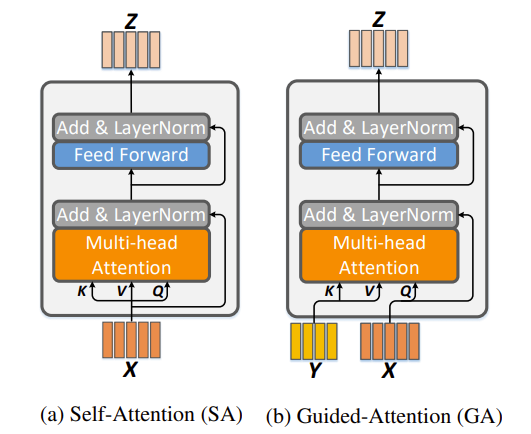

위 그림의 왼쪽은 MCAN에서 제시한 Guided-Attention 개념입니다. Transformer 모델의 self-attention과 달리, guided attention은 K와 V를 외부의 다른 벡터로부터 참조하는 구조입니다. 그러나 이 구조는 실은 위 그림의 오른쪽의 transformer Decoder에서 Encoder의 context vector를 K와 V로 참조하는 것과 동일한 구조임을 알수 있습니다.

즉, MCAN은 이미지와 텍스트 context vector끼리 단순히 dot product 하는 방식이 아니라 transformer의 encoder, decoder 입력 데이터간 attention처럼 참조하게끔 구조를 변경한 것이라고 볼 수 있습니다. 이렇게 이미지와 텍스트 modality간 상호참조하게 하는 Guided Attention 개념을 MCAN 논문에서는 다음과 같은 3가지 방식으로 실험하고 있습니다.

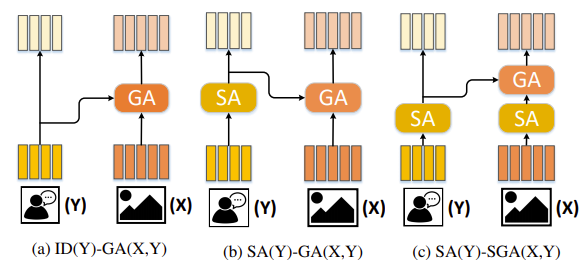

논문에서의 실험결과를 보면 근소하게 (c) 방법이 가장 성능이 좋은 것으로 드러납니다. 실은 이 방법은 transformer 모델에서 사용하고 있는 것과 동일합니다.

아래 그림은 이 논문에서 제시하는 VQA task에 대한 전체 시스템 구조입니다. 최근의 VQA 시스템은 이미지 feature를 object detection 모델의 것을 활용하는 것이 일반적이 되었습니다. 여기서는 Faster R-CNN을 사용하는 것으로 되어 있습니다. 그리고 텍스트의 경우 Glove로 임베딩한 LSTM으로 인코딩하고 있습니다. 이렇게 이미지와 텍스트의 representation을 구한 후 두 modality간 co-attention을 학습하는 부분이 있습니다. 이 논문에서는 이 부분에 MCAN이 사용됩니다. 이후 최종적으로 Multimodal fustion을 통해 output을 계산하는 부분은 이전의 다른 모델들과 큰 차이가 없습니다.

이런 구조는 현재까지도 VQA task를 위한 일반적인 모델링 구조가 되고 있습니다.

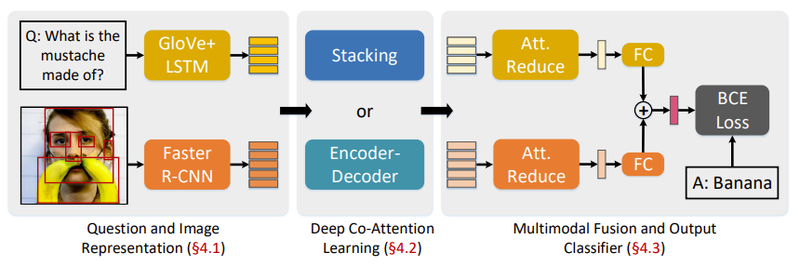

여기서 Co-attention을 위한 구조로 Stacking 혹은 Encoder-Decoder 구조 중 택일하는 것으로 되어 있습니다. 두 구조는 아래 그림과 같은 차이가 있습니다.

논문에서 제시하는 실험 결과로는 Stacking보다는 Encoder-Decoder 구조가 성능이 좀더 좋은 것으로 나옵니다.

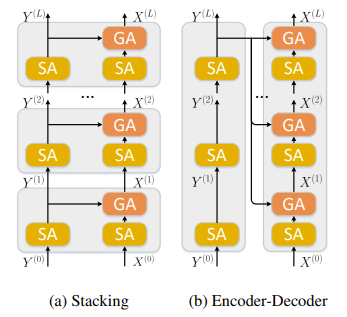

참고 : [[ML] 스태킹(Stacking) 완벽 정리](https://hwi-doc.tistory.com/entry/%EC%8A%A4%ED%83%9C%ED%82%B9Stacking-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC)

#19-5. LXMERT

##LXMERT : VQA Pretrained model

---

이전 스텝에서 살펴본 바와 같이 Co-attention 구조를 통해 VQA 같은 Multimodal NLP task를 구현하는 일반적인 솔루션을 살펴보았습니다.

그렇다면 이런 생각이 들지 않으시나요? 최신 딥러닝 기반 NLP 기술은 pretrained model을 바탕으로 급속도로 발전하고 있습니다. 그렇다면 Multimodal NLP task에는 이런 방법론을 적용할 수 없는 것일까요?

물론 그런 시도가 있었습니다. 이번 스텝에서는 2019년에 발표된 LXMERT(Learning Cross-Modality Encoder Representations from Transformers) 모델을 소개하려고 합니다. 이 모델은 발표된 이후 2020년 후반인 현재까지도 VQA 챌린지 리더보드의 상위권을 유지하고 있습니다.

🔶 LXMERT 모델 구조

아래 그림은 LXMERT 모델의 전체 구조입니다. 이 모델은 3개의 Encoder로 이루어져 있는데, 각각 Object-Relationship Encoder, Language Encoder, Cross-Modality Encoder로 이루어져 있습니다.

자세히 보면 이 모델은 이전 스텝에서 살펴본 MCAN의 모델 구조와 아주 닮아 있습니다. MCAN의 모델구조는 크게 1)Question and Image Representation 2)Deep Co-Attention Learning 3)Multimodal Fusion and Output Classifier의 3부분으로 되어 있었습니다.

MCAN은 Image Representation을 위해 Object Detection feature를 추출하는데, LXBERT는 이렇게 추출한 RoI(Region of Interest) feature와 Pos(Position) feature를 합쳐 다시 Object-Relationship Encoder를 거치게 되어 있습니다. MCAN은 VQA V2나 MS-COCO와 같은 기본적인 VQA 데이터셋을 사용했던 데 비해, LXMERT는 GQA같이 object-relationship 그래프를 포함하는 데이터셋을 활용하기 때문에, 이러한 관계 구조를 학습하기 위해 Object-Relationship Encoder를 하나 더 둔 것입니다. 또한 LXMERT에는 Word Embedding 이후 Language Encoder가 있어서 question을 인코딩하는데, 이것은 MCAN에서 Glove+LSTM으로 인코딩하는 것과 동일한 구조입니다. 즉, 아래 그림에서 Object-Relationship Encoder, Language Encoder까지는 MCAN의 Question and Image Representation 역할을 하는 것입니다.

그리고, MCAN에서 multi modality간 co-attention의 역할을 하는 부분을 LXMERT에서는 Cross-Modality Encoder가 담당하게 됩니다.

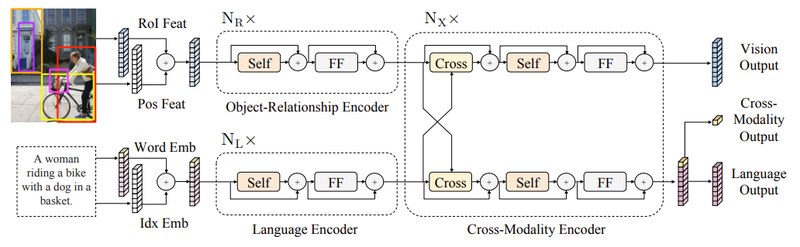

🔶 Transformer 기반 Encoder 모델

위 그림에서 Encoder 모델을 보면 Self로 표시된 Self-Attention 레이어와 FF로 표시된 Feed-Forward 레이어가 N개 겹쳐져 있는 구조로 되어 있음을 볼 수 있습니다. 이것은 정확히 Transformer Encoder 모델 구조입니다. 이런 모델 구조를 가진 pretrained model이 떠오르시나요? 그렇습니다. 이 모델 구조는 정확히 BERT의 것과 같습니다.

그런데 Co-attention 역할을 하는 Encoder에는 Cross로 표시된 Cross-attention 레이어가 포함되어 있습니다. 이 레이어의 구조는 MCAN의 guided attention과 같습니다. 이렇게 두 modality에서 온 입력을 동시에 attention으로 처리한 후에 다시 self-attention을 한 번 더 거치는 구조로 구현되어 있습니다.

여기서 주목할 점은 single modality만을 처리하는 Object-Relationship Encoder와 Language Encoder, 그리고 Cross modality를 처리하는 Cross-Modality Encoder 모델이 분리 설계되어 있다는 점입니다. MCAN 모델도 어느 정도 이런 성격을 가지고 있었습니다만, 이런 구조는 single modality 내부의 representation도 정확히 학습할 수 있으면서 modality간 관계도 정확하게 배울 수 있다는 장점이 있습니다.

🔶 Pretraining

LXMERT 모델같이 Multimodality task를 수행하는 모델을 pretrain하는 것은 그동안 많이 다루어왔던 Language model의 pretrain보다는 복잡합니다. 논문에서는 pretraining을 위해 다음의 총 5가지 task를 수행한다고 합니다. 아래 그림을 보면 5가지 task가 모두 end-to-end로 학습 가능함을 알 수 있습니다.

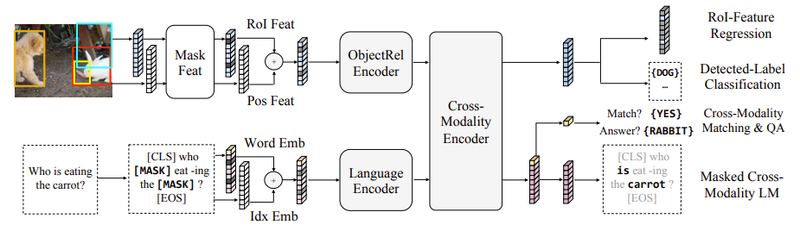

1) Language Task

Masked Cross-Modality LM : Language 입력에 대해 BERT의 Masked-LM과 동일하게, 일정 확률(0.15)로 입력 시퀀스 중 일부 토큰들을 [MASK]로 치환하고, 원래의 토큰을 맞추는 문제를 풀게 됩니다. BERT와 거의 같지만, Vision Feature로부터 단서를 얻어 예측을 할 수 있다는 차이가 있습니다. 위 그림에서 Carrot에 마스킹이 되었을 때, 언어만으로 이를 맞추기는 쉽지 않지만 Cross-modality attention을 통해 이를 맞출 수 있는 단서를 얻을 수도 있습니다.
2) Vision Task: 이미지 입력에 대해서도 object 시퀀스 중 일부를 0으로 치환(마스킹) 하고, 이 object의 특성을 예측하는 문제(Masked Object Prediction)를 풉니다. BERT의 masked language model과 동일한 아이디어인데, 여기서도 Cross-modality attention을 통해 언어를 단서로 삼아 아래의 문제를 풀 수 있게 됩니다.

RoI-Feature Regression : 마스킹된 Object의 RoI feature를 맞추는 문제
Detected Label Classification : 마스킹된 Object의 Faster R-CNN의 출력 클래스를 레이블로 하여 이를 맞추는 문제
3) Cross-Modality Task: cross-modality를 더 잘 학습하기 위해 다음과 같은 문제를 추가적으로 풀게 됩니다.

Cross-Modality Matching : 0.5의 확률로 이미지와 매치되지 않는 랜덤 문장을 샘플링하고, 이미지-문장 쌍이 매치되는지 예측하는 문제
Image Question Answering : 사전 학습 데이터 중 1/3 정도는 QA데이터 셋으로 구성하여, 마스킹 처리 없는 QA데이터셋에 대해 이미지와 질문을 주고 답을 찾는 문제